In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import random

import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

# Frozen Lake

### lake size = 5

In [ ]:
lake_size = 5
num_state = lake_size * lake_size

np.random.seed(2)

grid_world = generate_random_map(size = lake_size)
env = gym.make('FrozenLake-v0', desc=grid_world, is_slippery=True)

env.seed(2)

total_episodes = 20000
num_iterations = 2000000

In [ ]:
lake_color = []
layer = []
len_grid = len("".join(grid_world))

for i in range(lake_size):
    for j in range(lake_size):
        layer.append(grid_world[i][j])
        if grid_world[i][j] in ['S', 'G']:
            lake_color.append(1)
        elif grid_world[i][j] == 'H':
            lake_color.append(0.4)
        else:
            lake_color.append(0)

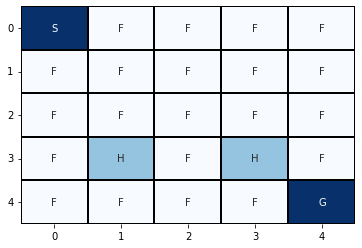

In [ ]:
sns.heatmap(np.array(lake_color).reshape(lake_size, lake_size), annot=np.array(layer).reshape(lake_size, lake_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

### lake size = 10

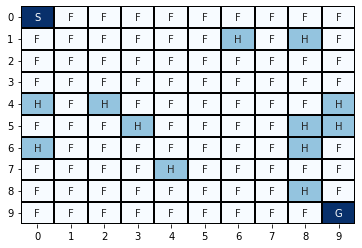

In [ ]:
lake_size = 10
num_state = lake_size * lake_size

np.random.seed(2)

grid_world = generate_random_map(size = lake_size)
env = gym.make('FrozenLake-v0', desc=grid_world, is_slippery=True)

env.seed(2)

total_episodes = 20000
num_iterations = 2000000

lake_color = []
layer = []
len_grid = len("".join(grid_world))

for i in range(lake_size):
    for j in range(lake_size):
        layer.append(grid_world[i][j])
        if grid_world[i][j] in ['S', 'G']:
            lake_color.append(1)
        elif grid_world[i][j] == 'H':
            lake_color.append(0.4)
        else:
            lake_color.append(0)

sns.heatmap(np.array(lake_color).reshape(lake_size, lake_size), annot=np.array(layer).reshape(lake_size, lake_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

### lake size = 15

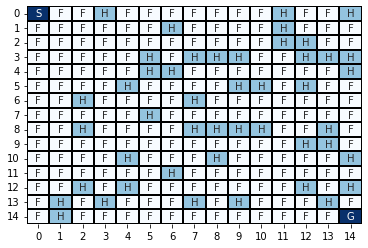

In [ ]:
lake_size = 15
num_state = lake_size * lake_size

np.random.seed(2)

grid_world = generate_random_map(size = lake_size)
env = gym.make('FrozenLake-v0', desc=grid_world, is_slippery=True)

env.seed(2)

total_episodes = 20000
num_iterations = 2000000

lake_color = []
layer = []
len_grid = len("".join(grid_world))

for i in range(lake_size):
    for j in range(lake_size):
        layer.append(grid_world[i][j])
        if grid_world[i][j] in ['S', 'G']:
            lake_color.append(1)
        elif grid_world[i][j] == 'H':
            lake_color.append(0.4)
        else:
            lake_color.append(0)

sns.heatmap(np.array(lake_color).reshape(lake_size, lake_size), annot=np.array(layer).reshape(lake_size, lake_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

### lake size = 20

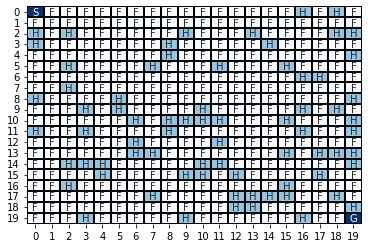

In [ ]:
lake_size = 20
num_state = lake_size * lake_size

np.random.seed(2)

grid_world = generate_random_map(size = lake_size)
env = gym.make('FrozenLake-v0', desc=grid_world, is_slippery=True)

env.seed(2)

total_episodes = 20000
num_iterations = 2000000

lake_color = []
layer = []
len_grid = len("".join(grid_world))

for i in range(lake_size):
    for j in range(lake_size):
        layer.append(grid_world[i][j])
        if grid_world[i][j] in ['S', 'G']:
            lake_color.append(1)
        elif grid_world[i][j] == 'H':
            lake_color.append(0.4)
        else:
            lake_color.append(0)

sns.heatmap(np.array(lake_color).reshape(lake_size, lake_size), annot=np.array(layer).reshape(lake_size, lake_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

### lake size = 25

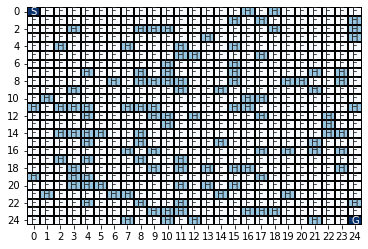

In [ ]:
lake_size = 25
num_state = lake_size * lake_size

np.random.seed(2)

grid_world = generate_random_map(size = lake_size)
env = gym.make('FrozenLake-v0', desc=grid_world, is_slippery=True)

env.seed(2)

total_episodes = 20000
num_iterations = 2000000

lake_color = []
layer = []
len_grid = len("".join(grid_world))

for i in range(lake_size):
    for j in range(lake_size):
        layer.append(grid_world[i][j])
        if grid_world[i][j] in ['S', 'G']:
            lake_color.append(1)
        elif grid_world[i][j] == 'H':
            lake_color.append(0.4)
        else:
            lake_color.append(0)

sns.heatmap(np.array(lake_color).reshape(lake_size, lake_size), annot=np.array(layer).reshape(lake_size, lake_size), cmap="Blues", fmt = '', cbar=False, linewidth=1, linecolor='black')
plt.yticks(rotation=0);

# 1. Value Iteration

## Helper Functions:

In [ ]:
def value_iteration(env, num_iterations = 200000, gamma = 1.0):
    value_table = np.zeros(env.observation_space.n)

    error_threshold = 1e-20
    error_lists = []

    utility_lists = []  

    converge_iterations = 0
    
    time_lists = []
    overall_start_time = time.time()

    for i in range(num_iterations):
        start_time = time.time()

        new_value_table = np.copy(value_table)

        utility = np.sum(new_value_table)
        utility_lists.append(utility)

        for state in range(env.observation_space.n):
            Q_value = []

            for action in range(env.action_space.n):
                next_state_reward = []

                for next_sr in env.P[state][action]: 
                    trans_prob, next_state, reward_prob, _ = next_sr 
                    next_state_reward.append((trans_prob * (reward_prob + gamma * new_value_table[next_state]))) 
                
                Q_value.append(np.sum(next_state_reward))

            value_table[state] = max(Q_value)

        error = np.sum(np.fabs(new_value_table - value_table))
        error_lists.append(error)
        
        stop_time = time.time()
        time_taken = stop_time - start_time
        time_lists.append(time_taken)

        if (error <= error_threshold):
             print('Converge iteration is # %d.' %(i+1))
             converge_iterations = i+1
             break

    overall_stop_time = time.time()
    overall_time_taken = overall_stop_time - overall_start_time

    return value_table, utility_lists, converge_iterations, overall_time_taken, error_lists, time_lists

def get_policy(value_table, gamma = 1.0):
    policy = np.zeros(env.observation_space.n) 

    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)

        for action in range(env.action_space.n):

            for next_sr in env.P[state][action]: 
                trans_prob, next_state, reward_prob, _ = next_sr 
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))

        policy[state] = np.argmax(Q_table)

    return policy


def visualize_policy(rewards, policy, grid_world, grid_size, title=""):
    sns.color_palette("Greens")

    policy_array = []

    len_grid = "".join(grid_world)

    for i in range(len(len_grid)):
        if len_grid[i] in ['S', 'G', 'H']:
            if len_grid[i] == 'S':
                policy_array.append(f"S{action_mapping[policy[i]]}")
            else:
                policy_array.append(len_grid[i])
        else :
            policy_array.append(action_mapping[policy[i]])
        
    sns.heatmap(rewards.reshape(grid_size, grid_size), annot=np.array(policy_array).reshape(grid_size, grid_size), cmap="Greens", fmt = '')

    plt.title(f'Optimal Policy of {title}');

## Test value iteration:

In [ ]:
value_table, utility_lists, converge_iterations, overall_time_taken, error_lists, time_lists = value_iteration(env, gamma=0.9)

Converge iteration is # 250.


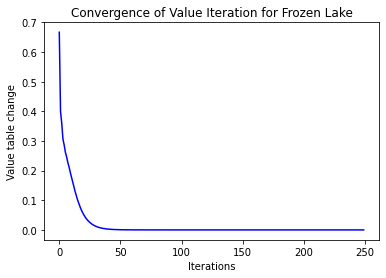

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations), error_lists, "b-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Value table change')
ax.set_title('Convergence of Value Iteration for Frozen Lake')
plt.show(fig)

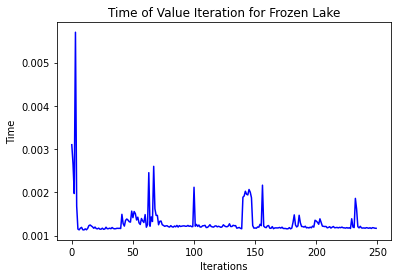

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations), time_lists, "b-")   #np.cumsum(time_lists)
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title('Time of Value Iteration for Frozen Lake')
plt.show(fig)

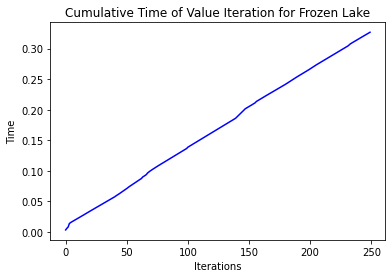

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations), np.cumsum(time_lists), "b-")   
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title('Cumulative Time of Value Iteration for Frozen Lake')
plt.show(fig)

In [ ]:
overall_time_taken

0.3276948928833008

## Value Iteration Figures：

### Different Gamma:

In [ ]:
loop = np.arange(0.1, 1 , 0.1)

util_opt_pol_loops_vi = []
converge_iterations_loops_vi = []
overoverall_time_taken_loops_vi = []
error_list_loops_vi = []
time_list_loops_vi = []

for i in loop:
    print("Current Discount Factor gamma is:", i)

    value_table, _, converge_iteration, overoverall_time_taken, error_lists, time_lists = value_iteration(env=env, gamma=i)

    util_opt_pol_loops_vi.append(value_table)
    converge_iterations_loops_vi.append(converge_iteration)
    overoverall_time_taken_loops_vi.append(overoverall_time_taken)
    error_list_loops_vi.append(error_lists)
    time_list_loops_vi.append(time_lists)

    print("Utility of optimal policy is:" , np.sum(value_table))
    print("Overall time to converge is:", overoverall_time_taken)

Current Discount Factor gamma is: 0.1
Converge iteration is # 21.
Utility of optimal policy is: 0.7160238767495104
Overall time to converge is: 0.024865150451660156
Current Discount Factor gamma is: 0.2
Converge iteration is # 29.
Utility of optimal policy is: 0.77756835687196
Overall time to converge is: 0.03486776351928711
Current Discount Factor gamma is: 0.30000000000000004
Converge iteration is # 37.
Utility of optimal policy is: 0.856430553751722
Overall time to converge is: 0.0435638427734375
Current Discount Factor gamma is: 0.4
Converge iteration is # 48.
Utility of optimal policy is: 0.9613338035540784
Overall time to converge is: 0.05997633934020996
Current Discount Factor gamma is: 0.5
Converge iteration is # 63.
Utility of optimal policy is: 1.1083797285646824
Overall time to converge is: 0.0762331485748291
Current Discount Factor gamma is: 0.6
Converge iteration is # 76.
Utility of optimal policy is: 1.3307626135947146
Overall time to converge is: 0.09473729133605957
Curr

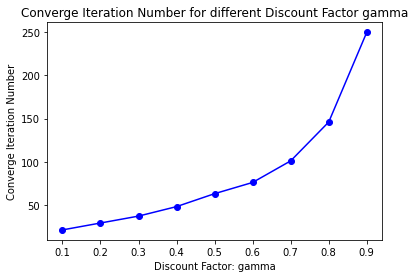

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop) , converge_iterations_loops_vi, "bo-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Discount Factor gamma')
plt.show(fig)

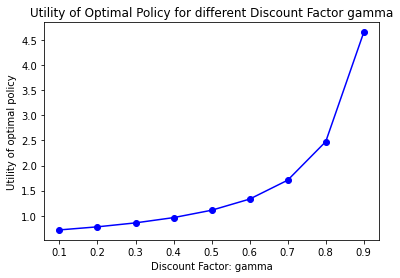

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop), [np.sum(i) for i in util_opt_pol_loops_vi], "bo-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Discount Factor gamma')

plt.show(fig)

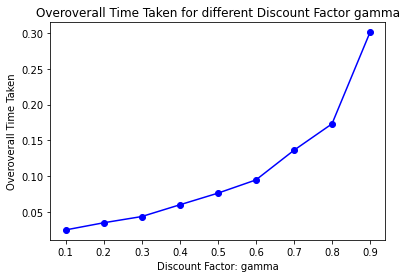

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop) , overoverall_time_taken_loops_vi, "bo-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Discount Factor gamma')

plt.show(fig)

### Different Lake Size:

In [ ]:
gamma = 0.9
 
loop_lake_size = [5, 10 , 15 , 20 , 25]
 
util_opt_pol_loops_vi_size = []
converge_iterations_loops_vi_size = []
overoverall_time_taken_loops_vi_size = []
error_list_loops_vi_size = []
time_list_loops_vi_size = []

for i in loop_lake_size:
    print("Current lake size is:", i)

    np.random.seed(2)
    grid = generate_random_map(size=i)
    env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
    env.seed(2)

    value_table, _, converge_iteration, overall_time_taken, error_lists, time_lists = value_iteration(env=env, gamma=gamma)

    util_opt_pol_loops_vi_size.append(value_table)
    converge_iterations_loops_vi_size.append(converge_iteration)
    overoverall_time_taken_loops_vi_size.append(overall_time_taken)
    error_list_loops_vi_size.append(error_lists)
    time_list_loops_vi_size.append(time_lists)

    print("Utility of optimal policy is:" ,np.sum(value_table))
    print("Overall Time Taken is:", overall_time_taken)

Current lake size is: 5
Converge iteration is # 250.
Utility of optimal policy is: 4.657805993689532
Overall Time Taken is: 0.314516544342041
Current lake size is: 10
Converge iteration is # 290.
Utility of optimal policy is: 5.054444430251122
Overall Time Taken is: 1.3780388832092285
Current lake size is: 15
Converge iteration is # 355.
Utility of optimal policy is: 3.047847048892051
Overall Time Taken is: 3.7196342945098877
Current lake size is: 20
Converge iteration is # 364.
Utility of optimal policy is: 2.140416709100795
Overall Time Taken is: 6.825937509536743
Current lake size is: 25
Converge iteration is # 381.
Utility of optimal policy is: 6.711016533204525
Overall Time Taken is: 11.157429933547974


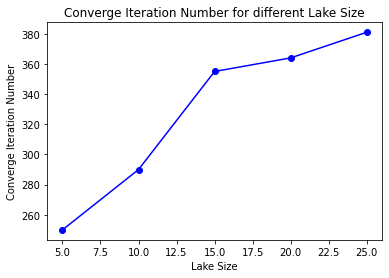

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop_lake_size) , converge_iterations_loops_vi_size, "bo-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Lake Size')
plt.show(fig)

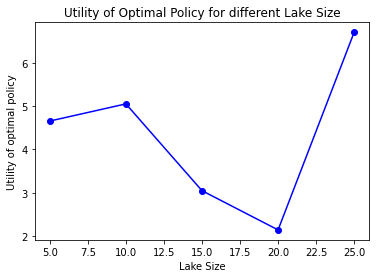

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_lake_size), [np.sum(i) for i in util_opt_pol_loops_vi_size], "bo-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Lake Size')

plt.show(fig)

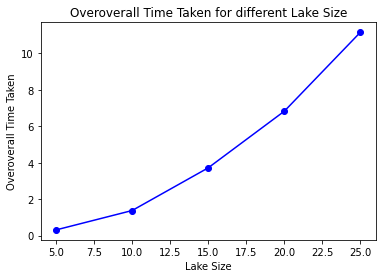

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_lake_size) , overoverall_time_taken_loops_vi_size, "bo-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Lake Size')

plt.show(fig)

# 2. policy iteration

## Helper Functions:

In [ ]:
def get_value_table(env, policy, gamma=1.0):

    value_table = np.zeros(env.nS)
    threshold = 1e-10

    while True:
        value_table_updated = np.copy(value_table)

        for state in range(env.nS):

            action = policy[state]
            value_table[state] = sum([trans_prob * (reward_prob + gamma * value_table_updated[next_state]) 
                                for trans_prob, next_state, reward_prob, _ in env.P[state][action]])
            
        if (np.sum((np.fabs(value_table_updated - value_table))) <= threshold):
            break

    return value_table


def get_policy(env, value_table, gamma = 1.0):

    policy = np.zeros(env.observation_space.n) 

    for state in range(env.observation_space.n):
        q_table = np.zeros(env.action_space.n)

        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]: 

                trans_prob, next_state, reward_prob, _ = next_sr 
                q_table[action] = q_table[action] + (trans_prob * (reward_prob + gamma * value_table[next_state]))

        policy[state] = np.argmax(q_table)
    
    return policy

def policy_iteration(env, num_iterations = 200000, gamma = 1.0):

    random_policy = np.zeros(env.observation_space.n) 

    converge_iterations = 0 

    utility_lists = []    
    error_list = []
    time_lists = []

    start_time = time.time()

    for i in range(num_iterations):
        start_time_i = time.time()

        new_value_table = get_value_table(env, random_policy, gamma)

        utility = np.sum(new_value_table)
        utility_lists.append(utility)

        new_policy = get_policy(env, new_value_table, gamma)

        error = np.sum((np.fabs(new_policy - random_policy)))
        error_list.append(error)

        end_time_i = time.time()
        time_lists.append(end_time_i - start_time_i)

        if (np.all(random_policy == new_policy)):
            print ('Converged Iteration is # %d' %(i+1))
            converge_iterations = i
            break

        random_policy = new_policy

    stop_time = time.time()
    overall_time_taken = stop_time - start_time

    return new_policy, utility_lists, converge_iterations, overall_time_taken, error_list, new_value_table, time_lists

## Test Policy Iteration:

In [ ]:
gamma = 0.9
policy, _, converge_iterations, overall_time_taken, error_lists, value_table, time_lists = policy_iteration(env=env, gamma=0.9)

Converged Iteration is # 6


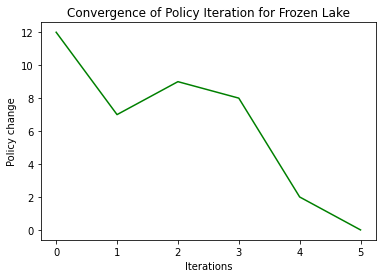

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations+1), error_lists, "g-")
ax.set_xlabel('Iterations')
ax.set_ylabel('Policy change')
ax.set_title('Convergence of Policy Iteration for Frozen Lake')
plt.show(fig)

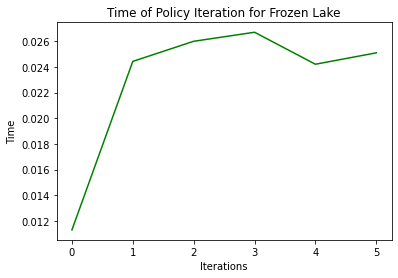

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations+1), time_lists, "g-")  
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title('Time of Policy Iteration for Frozen Lake')
plt.show(fig)

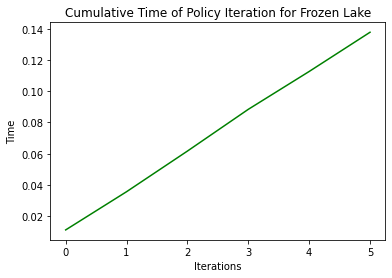

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(converge_iterations+1), np.cumsum(time_lists), "g-")   
ax.set_xlabel('Iterations')
ax.set_ylabel('Time')
ax.set_title('Cumulative Time of Policy Iteration for Frozen Lake')
plt.show(fig)

## Iteration Figures：

### Different Gamma:

In [ ]:
# gamma = 0.1 is toooooo slow
#policy, _, converge_iterations, overall_time_taken, error_lists, value_table, time_lists = policy_iteration(env=env, gamma=0.1)

In [ ]:
loop = np.arange(0.2, 1 , 0.1)

util_opt_pol_loops_pi = []
converge_iterations_loops_pi = []
overall_time_taken_loops_pi = []
error_list_loops_pi = []
time_list_loops_pi = []

rewards_table_pi = []
policy_pi = []

for i in loop:
    print("Current Discount Factor gamma is:", i)

    policy, _, converge_iteration, overall_time_taken, error_lists, value_table, time_lists = policy_iteration(env=env, gamma=i)

    rewards_table_pi.append(value_table)
    policy_pi.append(policy)

    converge_iterations_loops_pi.append(converge_iteration+1)
    overall_time_taken_loops_pi.append(overall_time_taken)
    error_list_loops_pi.append(error_lists)
    time_list_loops_pi.append(time_lists)

    print("Utility of optimal policy is:" , np.sum(value_table))
    print("Overall time to converge is:", overall_time_taken)

Current Discount Factor gamma is: 0.2
Converged Iteration is # 6
Utility of optimal policy is: 0.7775683568528142
Overall time to converge is: 0.01538991928100586
Current Discount Factor gamma is: 0.30000000000000004
Converged Iteration is # 7
Utility of optimal policy is: 0.8564305537320667
Overall time to converge is: 0.0292208194732666
Current Discount Factor gamma is: 0.4000000000000001
Converged Iteration is # 6
Utility of optimal policy is: 0.9613338034941872
Overall time to converge is: 0.029189109802246094
Current Discount Factor gamma is: 0.5000000000000001
Converged Iteration is # 6
Utility of optimal policy is: 1.1083797285091812
Overall time to converge is: 0.03475141525268555
Current Discount Factor gamma is: 0.6000000000000001
Converged Iteration is # 6
Utility of optimal policy is: 1.3307626134855384
Overall time to converge is: 0.04303550720214844
Current Discount Factor gamma is: 0.7000000000000002
Converged Iteration is # 6
Utility of optimal policy is: 1.707859819611

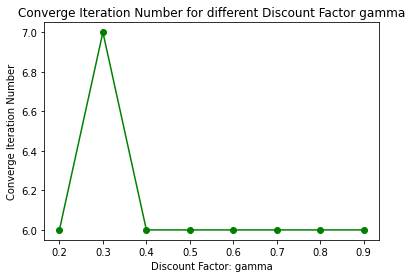

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop) , converge_iterations_loops_pi, "go-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Discount Factor gamma')
plt.show(fig)

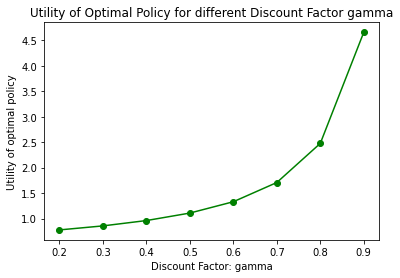

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop), [np.sum(i) for i in rewards_table_pi], "go-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Discount Factor gamma')

plt.show(fig)

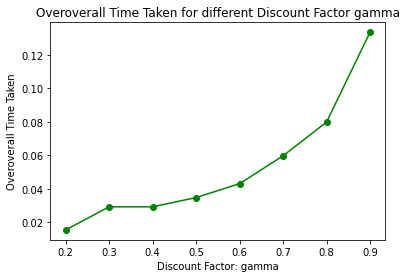

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop) , overall_time_taken_loops_pi, "go-")

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Discount Factor gamma')

plt.show(fig)

### Different Lake Size:

In [ ]:
gamma = 0.9
 
loop_lake_size = [5, 10 , 15 , 20 , 25]
 
util_opt_pol_loops_pi_size = []
converge_iterations_loops_pi_size = []
overoverall_time_taken_loops_pi_size = []
error_list_loops_pi_size = []
time_list_loops_pi_size = []

rewards_table_pi_size = []
policy_pi_size = []

for i in loop_lake_size:
    print("Current lake size is:", i)

    np.random.seed(2)
    grid = generate_random_map(size=i)
    env = gym.make('FrozenLake-v0', desc=grid, is_slippery=True)
    env.seed(2)

    policy, _, converge_iteration, overall_time_taken, error_lists, value_table, time_lists = policy_iteration(env=env, gamma=gamma)

    rewards_table_pi_size.append(value_table)
    policy_pi_size.append(policy)
    
    util_opt_pol_loops_pi_size.append(value_table)
    converge_iterations_loops_pi_size.append(converge_iteration)
    overoverall_time_taken_loops_pi_size.append(overall_time_taken)
    error_list_loops_pi_size.append(error_lists)
    time_list_loops_pi_size.append(time_lists)

    print("Utility of optimal policy is:" ,np.sum(value_table))
    print("Overall Time Taken is:", overall_time_taken)

Current lake size is: 5
Converged Iteration is # 6
Utility of optimal policy is: 4.65780599312275
Overall Time Taken is: 0.09064555168151855
Current lake size is: 10
Converged Iteration is # 12
Utility of optimal policy is: 5.054444429619839
Overall Time Taken is: 0.7610361576080322
Current lake size is: 15
Converged Iteration is # 17
Utility of optimal policy is: 3.0478470481955338
Overall Time Taken is: 2.2559962272644043
Current lake size is: 20
Converged Iteration is # 22
Utility of optimal policy is: 2.140416708368043
Overall Time Taken is: 5.577681303024292
Current lake size is: 25
Converged Iteration is # 29
Utility of optimal policy is: 6.711016532447825
Overall Time Taken is: 13.816090106964111


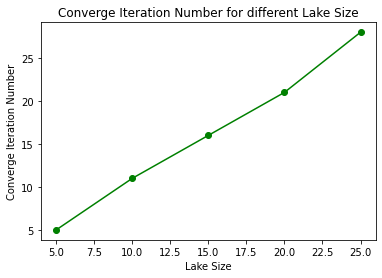

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop_lake_size) , converge_iterations_loops_pi_size, "go-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Lake Size')
plt.show(fig)

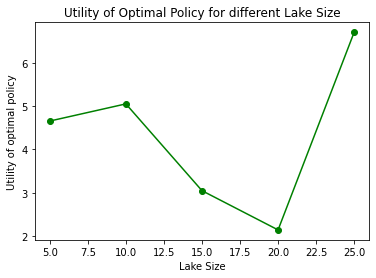

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_lake_size), [np.sum(i) for i in rewards_table_pi_size], "go-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Lake Size')

plt.show(fig)

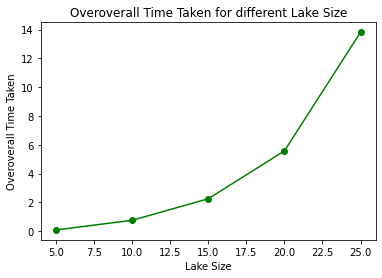

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_lake_size) , overoverall_time_taken_loops_pi_size, "go-")

ax.set_xlabel('Lake Size')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Lake Size')

plt.show(fig)

# 3. Compare Value Iteration and Policy Iteration

### Different Gamma:

state size = 5:

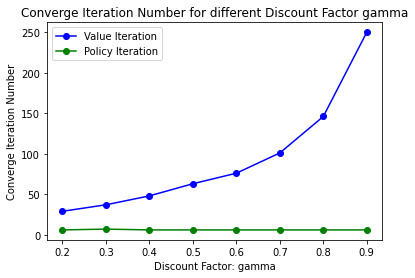

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop) , converge_iterations_loops_vi[1:], "bo-", label='Value Iteration')
ax.plot(list(loop) , converge_iterations_loops_pi, "go-", label='Policy Iteration')

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Discount Factor gamma')

ax.legend()
plt.show(fig)

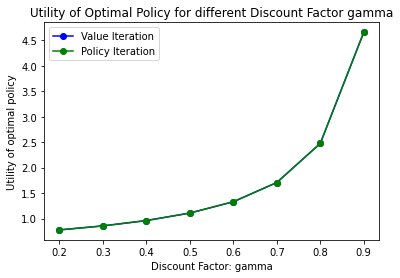

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop), [np.sum(i) for i in util_opt_pol_loops_vi[1:]], "bo-", label='Value Iteration')
ax.plot(list(loop), [np.sum(i) for i in rewards_table_pi], "go-", label='Policy Iteration')

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Discount Factor gamma')
ax.legend()
plt.show(fig)

In [ ]:
for i in util_opt_pol_loops_vi[1:]:
  print(np.sum(i))

0.77756835687196
0.856430553751722
0.9613338035540784
1.1083797285646824
1.3307626135947146
1.707859819788226
2.476213438458216
4.657805993689532


In [ ]:
for i in rewards_table_pi:
  print(np.sum(i))

0.7775683568528142
0.8564305537320667
0.9613338034941872
1.1083797285091812
1.3307626134855384
1.7078598196117285
2.4762134381685654
4.6578059931227545


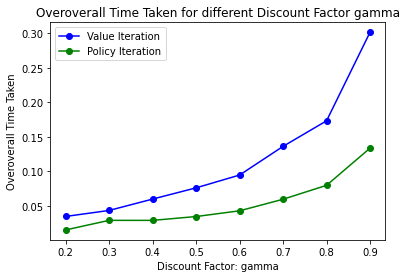

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop) , overoverall_time_taken_loops_vi[1:], "bo-", label='Value Iteration')
ax.plot(list(loop) , overall_time_taken_loops_pi, "go-", label='Policy Iteration')

ax.set_xlabel('Discount Factor: gamma')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Discount Factor gamma')
ax.legend()
plt.show(fig)

### Different Lake Size:

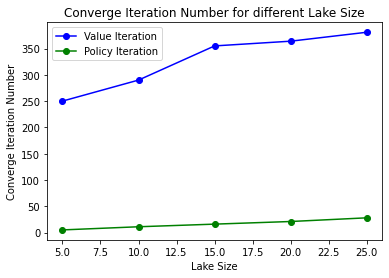

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop_lake_size) , converge_iterations_loops_vi_size, "bo-", label='Value Iteration')
ax.plot(list(loop_lake_size) , converge_iterations_loops_pi_size, "go-", label='Policy Iteration')

ax.set_xlabel('Lake Size')
ax.set_ylabel('Converge Iteration Number')

ax.set_title('Converge Iteration Number for different Lake Size')
ax.legend()
plt.show(fig)

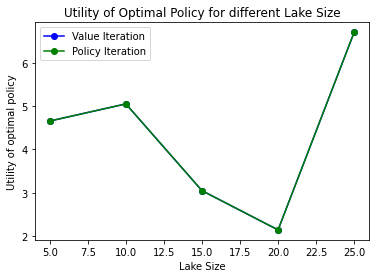

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop_lake_size), [np.sum(i) for i in util_opt_pol_loops_vi_size], "bo-", label='Value Iteration')
ax.plot(list(loop_lake_size), [np.sum(i) for i in rewards_table_pi_size], "go-", label='Policy Iteration')

ax.set_xlabel('Lake Size')
ax.set_ylabel('Utility of optimal policy')

ax.set_title('Utility of Optimal Policy for different Lake Size')
ax.legend()
plt.show(fig)

In [ ]:
for i in util_opt_pol_loops_vi_size:
  print(np.sum(i))

4.657805993689532
5.054444430251122
3.047847048892051
2.140416709100795
6.711016533204525


In [ ]:
for i in rewards_table_pi_size:
  print(np.sum(i))

4.65780599312275
5.054444429619839
3.0478470481955338
2.140416708368043
6.711016532447825


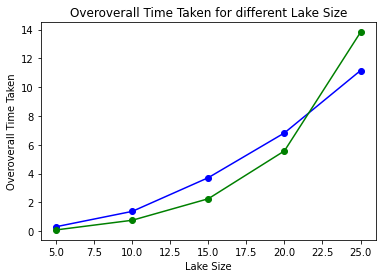

In [ ]:
fig, ax = plt.subplots()

ax.plot(list(loop_lake_size) , overoverall_time_taken_loops_vi_size, "bo-", label='Value Iteration')
ax.plot(list(loop_lake_size) , overoverall_time_taken_loops_pi_size, "go-", label='Policy Iteration')

ax.set_xlabel('Lake Size')
ax.set_ylabel('Overoverall Time Taken')

ax.set_title('Overoverall Time Taken for different Lake Size')

plt.show(fig)

# 4. Q Learning

## Helper Functions:

In [ ]:
action_mapping = {0:'←', 1:'↓', 2:'→', 3:'↑'}

def q_learning(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=False):
    q = {}

    for s in range(env.observation_space.n):
      for a in range(env.action_space.n):
         q[(s, a)] = 0

    def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
         qa = max([q[(nextstate, a)] for a in range(env.action_space.n)])
         q[(prev_state, action)] = q[(prev_state, action)] + alpha * (reward + gamma * qa - q[(prev_state,action)])

    def epsilon_greedy_policy(state, epsilon):
         if random.uniform(0,1) < epsilon:
             return env.action_space.sample()
         else:  
             return max(list(range(env.action_space.n)), key = lambda x: q[(state,x)])

    def get_optimal_policy(q_table, num_state):
        optimal_policy = np.zeros(num_state, dtype=int)
        reward_sequences = np.zeros(num_state, dtype=float)

        for s in range(num_state):
            optimal_policy[s] = np.argmax([q[(s, a)] for a in range(env.action_space.n)])
            reward_sequences[s] = q[(s, optimal_policy[s])]

        optimal_sign = []
        for s in range(num_state):
            if s == 0:
                optimal_sign.append(f"S{action_mapping[optimal_policy[s]]}")
            elif s == (lake_size*lake_size-1):
                optimal_sign.append('G')
            elif reward_sequences[s] == 0:
                optimal_sign.append('H')
            else:
                optimal_sign.append(action_mapping[optimal_policy[s]])
    
        return optimal_policy, reward_sequences, optimal_sign
    
    total_rewards = []
    iterations_list = []
    start_time = time.time()

    for i in range(total_episodes):
        r = 0
        prev_state = env.reset()

        #if i % 100000 == 0:
            #print(f"Average reward after {i} episodes", np.mean(total_rewards))

        for j in range(num_iterations):
            action = epsilon_greedy_policy(prev_state, epsilon)

            nextstate, reward, done, _ = env.step(action)

            update_q_table(prev_state, action, reward, nextstate, alpha, gamma)

            prev_state = nextstate

            r += reward

            if done:
                break

        if epsilon_decay:
            epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*i)
        
        total_rewards.append(r)
        iterations_list.append(j)

    env.close()

    stop_time = time.time()
    time_taken = stop_time - start_time

    optimal_policy, rewards, policy_sign = get_optimal_policy(q, num_state)

    return optimal_policy, rewards, policy_sign, time_taken, iterations_list

## Tune Parameters:

In [ ]:
total_episodes = 100000
num_iterations = 1000000

alpha = 0.9
gamma = 0.9

### Tune Epsilon:

#### No Decay

In [ ]:
epsilon_decay = False

loop_epsilon = np.arange(0.1, 1, 0.1)

list_optimal_policy = []
list_q_rewards = []
list_policy_sign = []
list_time_taken = []
list_iterations = []

for i in loop_epsilon:

    print("Current Epsilon is:", i)
    optimal_policy, q_rewards, policy_sign, time_taken, iteration = q_learning(env, total_episodes, num_iterations, num_state, alpha, gamma, i, epsilon_decay=epsilon_decay)
    
    list_optimal_policy.append(optimal_policy)
    list_q_rewards.append(q_rewards)
    list_policy_sign.append(policy_sign)
    list_time_taken.append(time_taken)
    list_iterations.append(iteration)

Current Epsilon is: 0.1
Current Epsilon is: 0.2
Current Epsilon is: 0.30000000000000004
Current Epsilon is: 0.4
Current Epsilon is: 0.5
Current Epsilon is: 0.6
Current Epsilon is: 0.7000000000000001


#### Decay

In [ ]:
epsilon_decay = True

max_epsilon = 1.0            
min_epsilon = 0.01  
decay_rate = 0.0001   

loop_epsilon = np.arange(0.1, 1, 0.1)

list_optimal_policy_ep_decay = []
list_q_rewards_ep_decay = []
list_policy_sign_ep_decay = []
list_time_taken_ep_decay = []
list_iterations_ep_decay = []

for i in loop_epsilon:
    print("Current Epsilon is:", i)
    optimal_policy, q_rewards, policy_sign, time_taken, iterations = q_learning(env, total_episodes, num_iterations, num_state, alpha, gamma, i, epsilon_decay=epsilon_decay)

    list_optimal_policy_ep_decay.append(optimal_policy)
    list_q_rewards_ep_decay.append(q_rewards)
    list_policy_sign_ep_decay.append(policy_sign)
    list_time_taken_ep_decay.append(time_taken)
    list_iterations_ep_decay.append(iterations)

Current Epsilon is: 0.1
Current Epsilon is: 0.2
Current Epsilon is: 0.30000000000000004
Current Epsilon is: 0.4
Current Epsilon is: 0.5
Current Epsilon is: 0.6
Current Epsilon is: 0.7000000000000001
Current Epsilon is: 0.8
Current Epsilon is: 0.9


#### Compare Decay vs No Decay:

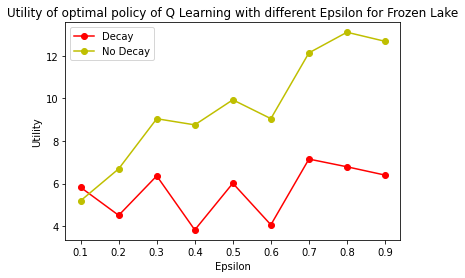

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , [np.sum(i) for i in list_q_rewards_ep_decay], "ro-", label='Decay')
ax.plot(list(loop_epsilon) , [np.sum(i) for i in list_q_rewards], "yo-", label='No Decay')

ax.set_xlabel('Epsilon')
ax.set_ylabel('Utility')
ax.set_title('Utility of optimal policy of Q Learning with different Epsilon for Frozen Lake')
ax.legend()
plt.show(fig)

In [ ]:
list_q_rewards_ep_decay

[array([0.02406017, 0.02882715, 0.08971357, 0.04013644, 0.05325141,
        0.02057446, 0.01814975, 0.11380096, 0.17004578, 0.68151474,
        0.02062069, 0.12285652, 0.12617547, 0.30145804, 0.68627963,
        0.0636998 , 0.        , 0.5983559 , 0.        , 0.65308932,
        0.14692353, 0.49837433, 0.42076502, 0.94161909, 0.        ]),
 array([0.0089787 , 0.01196643, 0.01570948, 0.01896497, 0.0256916 ,
        0.01342701, 0.01044781, 0.01740497, 0.05214995, 0.27331598,
        0.01520904, 0.0093847 , 0.01729385, 0.03803563, 0.66051127,
        0.03696447, 0.        , 0.08823667, 0.        , 0.97241601,
        0.10907676, 0.3314426 , 0.80257338, 0.97839241, 0.        ]),
 array([2.01853917e-02, 2.71693239e-02, 2.70003711e-02, 4.27568089e-01,
        5.80572852e-02, 2.54156029e-02, 3.62712191e-01, 5.69730485e-02,
        1.64932004e-01, 4.46499685e-01, 1.94455760e-02, 5.02053260e-02,
        5.03390209e-02, 1.63913644e-01, 8.54669917e-01, 1.26835099e-01,
        0.00000000e+00, 5.91

In [ ]:
list_q_rewards

[array([0.05004356, 0.09885369, 0.10608644, 0.15879718, 0.36009443,
        0.07632735, 0.03045588, 0.14959288, 0.24218514, 0.30653697,
        0.02454395, 0.02788898, 0.07418164, 0.12789823, 0.67466223,
        0.05533571, 0.        , 0.03381762, 0.        , 0.97412331,
        0.03470707, 0.06179687, 0.56255438, 0.96221199, 0.        ]),
 array([0.13910698, 0.19583086, 0.27974889, 0.29915937, 0.35772255,
        0.1158808 , 0.14992271, 0.14732496, 0.43582234, 0.34524297,
        0.13854302, 0.12359393, 0.46610694, 0.18425897, 0.53867614,
        0.15251387, 0.        , 0.0560992 , 0.        , 0.54708772,
        0.17449653, 0.18573756, 0.67827738, 0.97996872, 0.        ]),
 array([0.27073623, 0.36021958, 0.28000284, 0.24211564, 0.27029575,
        0.27243923, 0.2173309 , 0.27957068, 0.38983875, 0.6433585 ,
        0.2899902 , 0.26100562, 0.30396591, 0.28004843, 0.69976326,
        0.36418882, 0.        , 0.32591457, 0.        , 0.97985115,
        0.36242234, 0.47806549, 0.49098979, 

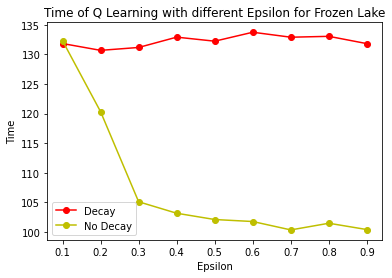

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_epsilon) , list_time_taken_ep_decay, "ro-", label='Decay')
ax.plot(list(loop_epsilon) , list_time_taken, "yo-", label='No Decay')

ax.set_xlabel('Epsilon')
ax.set_ylabel('Time')
ax.set_title('Time of Q Learning with different Epsilon for Frozen Lake')
ax.legend()
plt.show(fig)

### Tune Alpha:

In [ ]:
loop_alpha = np.arange(0.1, 1, 0.1)

epsilon_decay = False
best_epsilon = 0.8

list_optimal_policy_alpha = []
list_q_rewards_alpha = []
list_pol_sign_alpha = []
list_time_taken_alpha = []
list_iterations_alpha = []

for i in loop_alpha:
    print("Current Alpha is:", i)

    optimal_policy, rewards, policy_sign, time_taken, iterations = q_learning(env, total_episodes, num_iterations, num_state, i, gamma, best_epsilon, epsilon_decay=epsilon_decay)

    list_optimal_policy_alpha.append(optimal_policy)
    list_q_rewards_alpha.append(rewards)
    list_pol_sign_alpha.append(policy_sign)
    list_time_taken_alpha.append(time_taken)
    list_iterations_alpha.append(iterations)

Current Alpha is: 0.1
Current Alpha is: 0.2
Current Alpha is: 0.30000000000000004
Current Alpha is: 0.4
Current Alpha is: 0.5
Current Alpha is: 0.6
Current Alpha is: 0.7000000000000001
Current Alpha is: 0.8
Current Alpha is: 0.9


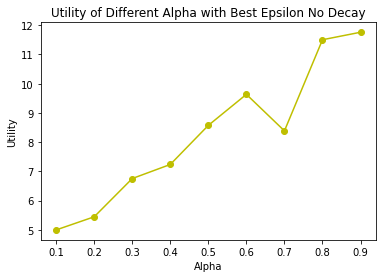

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , [np.sum(i) for i in list_q_rewards_alpha], "yo-")

ax.set_xlabel('Alpha')
ax.set_ylabel('Utility')
ax.set_title('Utility of Different Alpha with Best Epsilon No Decay')

plt.show(fig)

In [ ]:
list_q_rewards_alpha

[array([0.09531595, 0.11531287, 0.15148077, 0.17971859, 0.21910648,
        0.10061662, 0.12262788, 0.16114924, 0.21299286, 0.28014457,
        0.1054764 , 0.12552693, 0.16875597, 0.25812844, 0.42986156,
        0.12537124, 0.        , 0.14321174, 0.        , 0.68719113,
        0.17383703, 0.22129373, 0.32789663, 0.59002755, 0.        ]),
 array([0.1088355 , 0.12779222, 0.15937701, 0.19363396, 0.21925134,
        0.12149414, 0.14967501, 0.17775939, 0.22288754, 0.26081173,
        0.12398054, 0.16277265, 0.18970492, 0.24807896, 0.39781353,
        0.13361421, 0.        , 0.183321  , 0.        , 0.85239996,
        0.22698684, 0.25834216, 0.36518257, 0.56085779, 0.        ]),
 array([0.13768236, 0.16890892, 0.20219083, 0.25606748, 0.35668401,
        0.14801958, 0.16199854, 0.22614588, 0.26505379, 0.4266742 ,
        0.17365286, 0.18415773, 0.2201108 , 0.27842327, 0.54152388,
        0.19522255, 0.        , 0.15515083, 0.        , 0.70888293,
        0.29057238, 0.37058309, 0.55702806, 

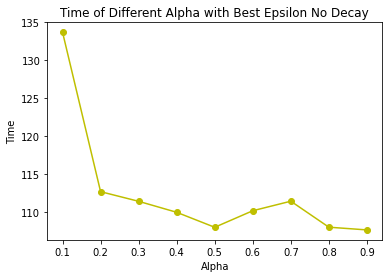

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_alpha) , list_time_taken_alpha, "yo-")

ax.set_xlabel('Alpha')
ax.set_ylabel('Time')
ax.set_title('Time of Different Alpha with Best Epsilon No Decay')

plt.show(fig)

### Tune Gamma:

In [ ]:
loop_gamma = np.arange(0.1, 1, 0.1)

epsilon_decay = False
best_epsilon = 0.8
best_alpha = 0.9

list_optimal_policy_gamma = []
list_q_rewards_gamma = []
list_pol_sign_gamma = []
list_time_taken_gamma = []
list_iterations_gamma = []

for i in loop_gamma:
    print("Current Gamma is:", i)

    optimal_policy, rewards, policy_sign, time_taken, iterations = q_learning(env, total_episodes, num_iterations, num_state, best_alpha, i, best_epsilon, epsilon_decay=epsilon_decay)

    list_optimal_policy_gamma.append(optimal_policy)
    list_q_rewards_gamma.append(rewards)
    list_pol_sign_gamma.append(policy_sign)
    list_time_taken_gamma.append(time_taken)
    list_iterations_gamma.append(iterations)

Current Gamma is: 0.1
Current Gamma is: 0.2
Current Gamma is: 0.30000000000000004
Current Gamma is: 0.4
Current Gamma is: 0.5
Current Gamma is: 0.6
Current Gamma is: 0.7000000000000001
Current Gamma is: 0.8
Current Gamma is: 0.9


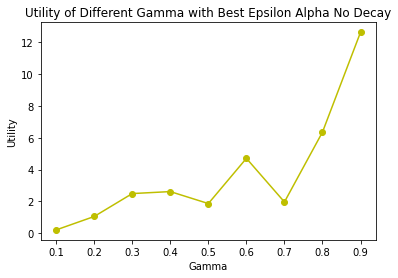

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , [np.sum(i) for i in list_q_rewards_gamma], "yo-")

ax.set_xlabel('Gamma')
ax.set_ylabel('Utility')
ax.set_title('Utility of Different Gamma with Best Epsilon Alpha No Decay')

plt.show(fig)

In [ ]:
list_q_rewards_gamma

[array([1.37536429e-09, 4.53180499e-09, 7.74405634e-06, 7.94857077e-05,
        6.10432660e-06, 4.80209702e-08, 7.15258423e-06, 7.89825615e-05,
        7.89050607e-04, 8.76668647e-03, 6.38669690e-08, 6.01064555e-06,
        9.21484891e-05, 9.50403671e-04, 9.73979017e-02, 5.90395699e-06,
        0.00000000e+00, 2.56792559e-06, 0.00000000e+00, 9.82905783e-02,
        5.95805953e-05, 3.02848530e-05, 1.71159479e-03, 9.18837084e-03,
        0.00000000e+00]),
 array([4.96331329e-07, 8.86025260e-07, 4.72643441e-06, 1.50779693e-05,
        1.24561726e-04, 3.76741146e-06, 3.35820098e-06, 1.52277855e-05,
        7.50272278e-05, 5.14364355e-04, 7.39075563e-05, 1.46442505e-05,
        3.96140000e-04, 2.19771855e-04, 1.21933281e-02, 4.16808799e-04,
        0.00000000e+00, 1.67726021e-05, 0.00000000e+00, 5.51844146e-02,
        2.26981696e-03, 1.03858965e-02, 5.07288573e-02, 9.27732620e-01,
        0.00000000e+00]),
 array([3.71734465e-05, 4.35928944e-04, 5.92720105e-04, 4.54793759e-04,
        2.04

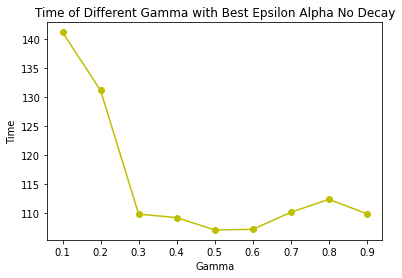

In [ ]:
fig, ax = plt.subplots()
ax.plot(list(loop_gamma) , list_time_taken_gamma, "yo-")

ax.set_xlabel('Gamma')
ax.set_ylabel('Time')
ax.set_title('Time of Different Gamma with Best Epsilon Alpha No Decay')

plt.show(fig)

# 5. Visualize optimal policy:

## Helper functions:

In [ ]:
def agent_go(env, policy):
     prev_state = env.reset()
     start_state = 0
     r = 0

     while True:
        nextstate, reward, done, _ = env.step(policy[start_state])
        start_state = nextstate
        r = r + reward

        if done:
           break

     return r


def policy_score(env, policy, n = 1000):
    list_score = []

    for i in range(n):
        scores = agent_go(env, policy)
        list_score.append(scores)

    return np.sum(list_score)/len(list_score)

## Optimal Policy of Value Iteration:

Converge iteration is # 250.
Score of Optimal Policy by Value Iteration is: 85.22 % 0.35991835594177246 s


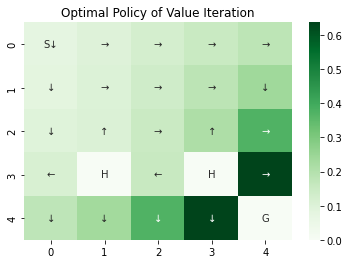

In [ ]:
gamma = 0.9

value_table, utility_iteration, final_iterations, time_taken, error_lists, time_taken_lists = value_iteration(env, gamma=gamma)

policy_value_iteration = get_policy(value_table, gamma)

visualize_policy(value_table, policy_value_iteration, grid_world=grid_world, grid_size=5 , title="Value Iteration")

print("Score of Optimal Policy by Value Iteration is:", policy_score(env, policy_value_iteration, 10000) * 100, "%", time_taken, 's')

## Optimal Policy of Policy Iteration:

Converged Iteration is # 6
Score of Optimal Policy by Policy Iteration is: 85.53 % 0.13808274269104004 s


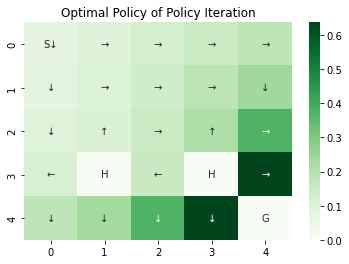

In [ ]:
gamma = 0.9

policy_policy_iteration, _, converged_iteration, time_taken, error_lists, value_table, time_taken_lists = policy_iteration(env=env, gamma=gamma)

visualize_policy(value_table, policy_policy_iteration, grid_world=grid_world, grid_size=5 , title="Policy Iteration")

print("Score of Optimal Policy by Policy Iteration is:", policy_score(env, policy_policy_iteration, 10000) * 100, "%", time_taken, 's')

## Optimal Policy of Q Learning:

Score of Optimal Policy by Q Learning is: 51.92 % 136.68659353256226 s


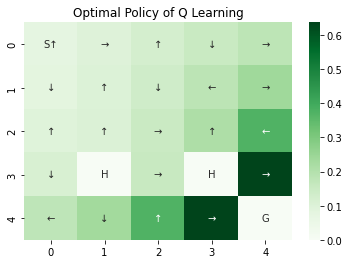

In [ ]:
epsilon = 0.8
alpha = 0.9
gamma = 0.9
epsilon_decay = False

policy_q_learning, fin_q_rewards, fin_ql_policy_sign, time_taken, _ = q_learning(env, total_episodes, num_iterations, num_state, alpha, gamma, epsilon, epsilon_decay=epsilon_decay)

visualize_policy(value_table, policy_q_learning, grid_world=grid_world, grid_size=5 , title="Q Learning")

print("Score of Optimal Policy by Q Learning is:", policy_score(env, policy_q_learning, 10000) * 100, "%", time_taken, 's')